**Inferences About the Linear Correlation Coefficient**

In order to test if two variables are linearly correlated, or in other words, whether there is a linear relationship between the two variables, we may apply the so-called **correlation $t$-test.** The **population correlation coefficient, $\rho$**, measures the linear correlation of two variables in the same manner as the **sample linear correlation coefficient, $r$,** measures the linear correlation of two variables of sample of pairs. Both $\rho$ and $r$ describe the strength of the linear relationship between two variables; however, $r$, is an estimate of $\rho$ obtained from the sample data.

The linear correlation coefficient of two variables lies between $-1$ and $1$. If $\rho = 0$ the variables are linearly uncorrelated, thus there is no linear relationship between the variables. If $\rho \neq 0$ the variables are linearly correlated. If $\rho > 0$, the variables are positively linearly correlated, and if $\rho < 0$ the variables are negatively linearly correlated.

A commonly used statistic to calculate the linear relationship between quantitative variables is the **Pearson product moment correlation coefficient**. It is given by

$$r = \frac{\sum_{i=1}^n(x_i- \bar x)(y_i - \bar y)}{\sqrt{\sum_{i=1}^n(x_i- \bar x)^2}\sqrt{\sum_{i=1}^n(y_i- \bar y)^2}}=\frac{s_{xy}}{s_x s_y}\text{,}$$

where $s_{xy}$ is the covariance of $x$ and $y$ and $s_x$ and $s_y$ are the standard deviations of $x$ and $y$, respectively.

As the sample linear correlation coefficient, $r$, is an estimate of the population linear correlation coefficient, $\rho$, we may use $r$ for a hypothesis test for $\rho$. The test statistic for a **correlation test** has $t$-distribution with $n-2$ degrees of freedom and may be written as

$$ t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}.$$

**The Correlation $t$-Test: An Example**

We load the *students* data set.

In [1]:
import pandas as pd

students_df = pd.read_csv("https://userpage.fu-berlin.de/soga/200/2010_data_sets/students.csv")

In order to showcase the correlation $t$-test we examine the relationship between the variable *score1* and *score2*, which show the result of two mandatory statistical exams. **The question is, whether there is a linear relationship betweeen the grades of two consecutive statistic exams?**

**Data preparation**

We start with data preparation.

- We subset the data based on the *score1* and *score2* variables. We drop any *NA* value in the data set

- Then we sample from each subset $50$ students and extract the variables of interest.

In [5]:
complete = students_df.dropna(subset=['score1','score2'])

n = 50

sample = complete.sample(n)

In [6]:
score1 = sample['score1']
score2 = sample['score2']

For the purpose of visual inspection we plot the random sample in form of a scatter plot

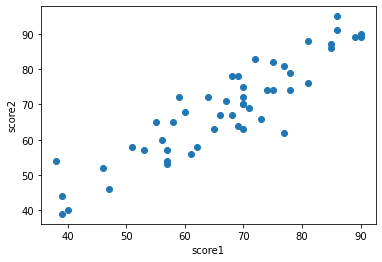

In [8]:
import matplotlib.pyplot as plt

plt.scatter(score1,score2)
plt.xlabel('score1')
plt.ylabel('score2')

pass

The visual inspection indicates an existing positive linear relationship between the variables *score1* and *score2*.

**Hypothesis testing**

In order to conduct the **correlation $t$-test** we follow the step-wise implementation procedure for hypothesis testing. The **correlation $t$-test** follows the same step-wise procedure as discussed in the previous sections.

\begin{array}{l}
\hline
\ \text{Step 1}  & \text{State the null hypothesis } H_0 \text{ and alternative hypothesis } H_A \text{.}\\
\ \text{Step 2}  & \text{Decide on the significance level, } \alpha\text{.} \\
\ \text{Step 3}  & \text{Compute the value of the test statistic.} \\
\ \text{Step 4} &\text{Determine the p-value.} \\
\ \text{Step 5} & \text{If } p \le \alpha \text{, reject }H_0 \text{; otherwise, do not reject } H_0 \text{.} \\
\ \text{Step 6} &\text{Interpret the result of the hypothesis test.} \\
\hline 
\end{array}

**Step 1: State the null hypothesis $H_0$ and alternative hypothesis $H_A$**

The null hypothesis states that there is no linear relationship between the grades of two consecutive statistic exams.

$$H_0 : r=0$$

Recall, that the formulation of the alternative hypothesis dictates if we apply a two-sided, a left tailed or a right tailed hypothesis test.

**Alternative hypothesis**

$$H_A : r \neq 0$$

This formulation results in a two-sided hypothesis test.

**Step 2: Decide on the significance level, $\alpha$**

In [9]:
alpha = 0.01

**Step $3$ and $4$: Compute the value of the test statistic and the $p$-value.**

For illustration purposes we manually compute the test statistic in Python. Recall the equation form above:

$$t= \frac{r}{\sqrt{\frac{1-r^2}{n-2}}}$$

In [11]:
n = len(score1)

# compute the value of the test statistic

# pearson correlation coefficient r

import numpy as np

r = np.corrcoef(score1,score2)[0, 1]

# test statistic

import math

t_statistic = r/(math.sqrt((1-r**2)/(n-2)))

t_statistic

15.094222351795068

In [14]:
# compute df

df = n-2 

# compute the p-value, two-sided test

from scipy.stats import t

p_upper = 1-t.cdf(t_statistic,df=df)
p_lower = t.cdf(-t_statistic,df=df)

p = p_upper + p_lower

p

3.7317642583344205e-20

**Step 5: If $p \leq \alpha$, reject $H_0$; otherwise, do not reject $H_0$.**

The $p$-value is less than the specified significance level of $0.01$; we reject $H_0$. The test results are statistically significant at the $1$% level and provide very strong evidence against the null hypothesis.


**Step 6: Interpret the result of the hypothesis test.**

$p=3.7317642583344205 \times 10^{-20}$. At the $1$% significance level, the data provides very strong evidence to conclude that the exam grades of students are linearly correlated.

**Hypothesis testing in Python**

In [16]:
from scipy.stats import pearsonr

# p-value is calculated 
pearsonr(score1,score2)

#the p-value comes out different not sure why

(0.9088362176698311, 7.463528516669254e-20)